In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/purchase.csv')
data

,ID,Age,Gender,Income,Education,Marital Status,Purchased
0,1,22,Male,35,Bachelor,Single,No
1,2,25,Female,40,Master,Single,Yes
2,3,47,Male,85,PhD,Married,Yes
3,4,52,Female,110,Bachelor,Married,No
4,5,46,Male,78,Master,Married,Yes
5,6,56,Female,95,Bachelor,Single,No
6,7,35,Female,60,PhD,Married,Yes
7,8,33,Male,58,Bachelor,Single,No
8,9,29,Female,45,Master,Single,Yes
9,10,41,Male,80,PhD,Married,Yes


In [4]:
le=LabelEncoder()
data['Age_n']=le.fit_transform(data['Age'])
data['Gender_n']=le.fit_transform(data['Gender'])
data['Income_n']=le.fit_transform(data['Income'])
data['Education_n']=le.fit_transform(data['Education'])
data['Marital_status_n']=le.fit_transform(data['Marital Status'])
data['Purchased_n']=le.fit_transform(data['Purchased'])
data

,ID,Age,Gender,Income,Education,Marital Status,Purchased,Age_n,Gender_n,Income_n,Education_n,Marital_status_n,Purchased_n
0,1,22,Male,35,Bachelor,Single,No,0,1,0,0,1,0
1,2,25,Female,40,Master,Single,Yes,1,0,1,1,1,1
2,3,47,Male,85,PhD,Married,Yes,7,1,7,2,0,1
3,4,52,Female,110,Bachelor,Married,No,8,0,9,0,0,0
4,5,46,Male,78,Master,Married,Yes,6,1,5,1,0,1
5,6,56,Female,95,Bachelor,Single,No,9,0,8,0,1,0
6,7,35,Female,60,PhD,Married,Yes,4,0,4,2,0,1
7,8,33,Male,58,Bachelor,Single,No,3,1,3,0,1,0
8,9,29,Female,45,Master,Single,Yes,2,0,2,1,1,1
9,10,41,Male,80,PhD,Married,Yes,5,1,6,2,0,1


In [5]:
data.drop(['ID','Age','Gender','Income','Education','Marital Status','Purchased'],axis=1)

,Age_n,Gender_n,Income_n,Education_n,Marital_status_n,Purchased_n
0,0,1,0,0,1,0
1,1,0,1,1,1,1
2,7,1,7,2,0,1
3,8,0,9,0,0,0
4,6,1,5,1,0,1
5,9,0,8,0,1,0
6,4,0,4,2,0,1
7,3,1,3,0,1,0
8,2,0,2,1,1,1
9,5,1,6,2,0,1


In [6]:
In_var=data[['Age_n','Gender_n','Income_n','Education_n','Marital_status_n']]
dep_var=data['Purchased_n']

In [7]:
In_var

,Age_n,Gender_n,Income_n,Education_n,Marital_status_n
0,0,1,0,0,1
1,1,0,1,1,1
2,7,1,7,2,0
3,8,0,9,0,0
4,6,1,5,1,0
5,9,0,8,0,1
6,4,0,4,2,0
7,3,1,3,0,1
8,2,0,2,1,1
9,5,1,6,2,0


In [8]:
dep_var

,Purchased_n
0,0
1,1
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [9]:
x_train,xtest,y_tain,y_test=train_test_split(In_var,dep_var,test_size=0.5,random_state=42)

In [10]:
model=RandomForestClassifier(n_estimators=2)
model.fit(x_train,y_tain)

RandomForestClassifier(n_estimators=2)

In [11]:
y_pred=model.predict(xtest)

In [12]:
y_pred

array([0, 0, 0, 1, 1])

In [13]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accracy: {accuracy*100:.2f}")

Accracy: 20.00


In [14]:
new_data=[[2,1,0,3,1]]

In [15]:
prediction=model.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
prediction

array([1])

In [17]:
from sklearn.tree import plot_tree
feature_names=['Age_n','Gender_n','Income_n','Education_n','Marital_status_n']


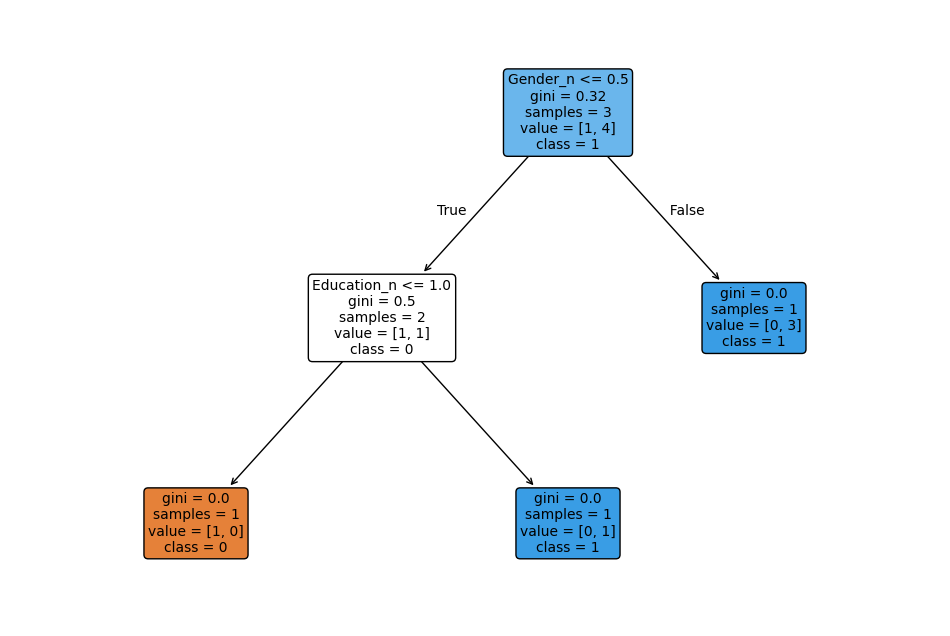

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
tree_in_forest = model.estimators_[0]

plt.figure(figsize=(12,8))
plot_tree(
    tree_in_forest,
    feature_names=feature_names,
    class_names=[str(cls) for cls in model.classes_],  # convert to strings
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
